In [35]:
from pyspi.utils.function_utils import find_response_version
from pyspi.utils.response.spi_response_data import ResponseDataRMF
from pyspi.utils.response.spi_response import ResponseRMFGenerator
from pyspi.utils.response.spi_drm import SPIDRM
from pyspi.utils.livedets import get_live_dets

import numpy as np


In [36]:
time1 = "051105 061512"
ra, dec = 10., -40.

In [37]:
version = find_response_version(time1)
rsp_base = ResponseDataRMF.from_version(version)
dets = get_live_dets(time=time1, event_types=["single"])

Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)


In [38]:
ein = np.array(np.linspace(20,1000,4))
ebounds = np.array(np.linspace(20,1000,4))
d = 0

In [39]:
rsp1 = ResponseRMFGenerator.from_time(time1,  d,
                                            ebounds, ein,
                                            rsp_base)
sd1 = SPIDRM(rsp1, ra, dec)
print(ein)
print(sd1.matrix)

[  20.          346.66666667  673.33333333 1000.        ]
[[13.823791    2.70435285  1.79275684]
 [ 0.          8.53337789  1.70787271]
 [ 0.          0.          6.04052616]]


In [40]:
ein = np.array(np.linspace(20,1000,7))
ebounds = np.array(np.linspace(20,1000,4))


In [41]:
rsp2 = ResponseRMFGenerator.from_time(time1,  d,
                                            ebounds, ein,
                                            rsp_base)
sd2 = SPIDRM(rsp2, ra, dec)
print(ein)
print(sd2.matrix)

[  20.          183.33333333  346.66666667  510.          673.33333333
  836.66666667 1000.        ]
[[14.06299834 15.31597976  2.85573938  2.29760791  1.91975918  1.63880981]
 [ 0.          0.          8.38959361  8.25712902  1.8686086   1.15987021]
 [ 0.          0.          0.          0.          5.73556994  5.82934172]]


In [42]:
print(sd1.matrix[0,0])
print(sd2.matrix[0,:2])

13.82379100056793
[14.06299834 15.31597976]


In [43]:
# should the value from sd1 not lie inbetween the two sd2 values?

In [3]:
import astropy.io.fits as fits
from astropy.table import Table
import astropy.time as at
from datetime import datetime
import numpy as np


In [4]:
data_path = "./main_files/spimodfit_comparison_sim_source/pyspi_real_bkg/0374"

# Pointings and Start Times
with fits.open(f"{data_path}/pointing.fits") as file:
    t = Table.read(file[1])
    
    pointings = np.array(t["PTID_SPI"])
    
    time_start = np.array(t["TSTART"]) + 2451544.5
    time_start = [at.Time(f"{i}", format="jd").datetime for i in time_start]
    time_start = np.array([datetime.strftime(i,'%y%m%d %H%M%S') for i in time_start])

In [5]:
t

PTID_ISOC,PTID_SPI,OBT_START,OBT_END,TSTART,TSTOP,TELAPSE,RA_SPIX,DEC_SPIX,RA_SPIZ,DEC_SPIZ
,,,,d,d,s,deg,deg,deg,deg
str8,str15,uint16[4],uint16[4],float64,float64,float64,float32,float32,float32,float32
03740001,03740001.000000,0 .. 63737,0 .. 43300,2135.2520391666667,2135.2588705421003,590.230837467243,14.359367,-46.588104,229.94302,-37.57425
03740002,03740002.000000,0 .. 63308,0 .. 46651,2135.260557685185,2135.291722883317,2692.673118598759,13.767507,-46.369335,230.1961,-37.48927
03740003,03740003.000000,0 .. 61659,0 .. 57115,2135.293150277778,2135.3240407251647,2668.9346542203566,11.059443,-45.68437,230.99942,-36.81915
03740004,03740004.000000,0 .. 60025,0 .. 15008,2135.3254650925924,2135.3563160307904,2665.521060307219,8.418544,-44.942196,231.72835,-36.096745
03740005,03740005.000000,0 .. 58374,0 .. 31713,2135.358057685185,2135.3885297749794,2632.788558230095,5.848483,-44.144936,232.3689,-35.334618
03740006,03740006.000000,0 .. 56748,0 .. 32146,2135.389909537037,2135.420778061946,2667.0405521188513,3.3409438,-43.29776,232.92168,-34.53164
03740007,03740007.000000,0 .. 55089,0 .. 44763,2135.422131759259,2135.4530923111793,2674.9916858956567,4.515532,-41.49371,234.48235,-36.024696
03740008,03740008.000000,0 .. 53411,0 .. 51792,2135.454446574074,2135.4853493518517,2669.9999999807915,6.964257,-42.318604,233.91713,-36.858116


In [2]:
import numpy as np

a = np.geomspace(18,2000,100)
print(a)

[  18.           18.87716284   19.79707094   20.76180732   21.77355654
   22.83460958   23.94736907   25.11435476   26.33820913   27.62170348
   28.96774414   30.37937907   31.85980476   33.41237347   35.04060082
   36.74817376   38.5389589    40.41701127   42.38658351   44.45213551
   46.61834447   48.89011555   51.27259292   53.77117143   56.39150884
   59.13953862   62.02148337   65.04386896   68.21353922   71.53767154
   75.02379305   78.67979768   82.51396405   86.53497422   90.75193331
   95.17439018   99.81235897  104.67634187  109.77735283  115.12694253
  120.73722452  126.62090267  132.79129992  139.26238846  146.04882135
  153.16596573  160.62993759  168.45763826  176.66679273  185.2759897
  194.30472377  203.7734395   213.70357777  224.11762428  235.03916048
  246.49291701  258.50482962  271.10209797  284.3132472   298.16819249
  312.69830684  327.9364921   343.91725347  360.67677762  378.25301464
  396.68576399  416.01676461  436.28978942  457.55074445  479.84777279
  503.2

In [4]:
print(a[:70])

[ 18.          18.87716284  19.79707094  20.76180732  21.77355654
  22.83460958  23.94736907  25.11435476  26.33820913  27.62170348
  28.96774414  30.37937907  31.85980476  33.41237347  35.04060082
  36.74817376  38.5389589   40.41701127  42.38658351  44.45213551
  46.61834447  48.89011555  51.27259292  53.77117143  56.39150884
  59.13953862  62.02148337  65.04386896  68.21353922  71.53767154
  75.02379305  78.67979768  82.51396405  86.53497422  90.75193331
  95.17439018  99.81235897 104.67634187 109.77735283 115.12694253
 120.73722452 126.62090267 132.79129992 139.26238846 146.04882135
 153.16596573 160.62993759 168.45763826 176.66679273 185.2759897
 194.30472377 203.7734395  213.70357777 224.11762428 235.03916048
 246.49291701 258.50482962 271.10209797 284.3132472  298.16819249
 312.69830684 327.9364921  343.91725347 360.67677762 378.25301464
 396.68576399 416.01676461 436.28978942 457.55074445 479.84777279]


In [5]:
b = np.geomspace(18, 3000, 75)
print(b)

[  18.           19.28845704   20.66914306   22.1486599    23.73408195
   25.43299001   27.25350751   29.20433939   31.29481366   33.53492605
   35.93538782   38.5076769    41.26409288   44.21781572   47.38296884
   50.77468662   54.40918677   58.30384788   62.47729252   66.94947628
   71.74178319   76.87712797   82.38006558   88.27690869   94.5958534
  101.36711416  108.62306818  116.39841026  124.73031869  133.65863301
  143.22604453  153.47830042  164.4644225   176.2369416   188.85214876
  202.3703644   216.85622672  232.37900077  249.01290969  266.83748957
  285.93796975  306.40568039  328.33848913  351.8412691   377.02640031
  404.01430706  432.93403374  463.92386183  497.13197116  532.71714841
  570.84954634  611.71149742  655.49838565  702.41958081  752.69943954
  806.57837818  864.31402226  926.18243842  992.4794544  1063.52207355
 1139.64999066 1221.22721616 1308.64381671 1402.3177803  1502.69701491
 1610.26149019 1725.52553247 1849.04028403 1981.39633848 2123.22656463
 2275.2

In [8]:
print(b[:50])

[ 18.          19.28845704  20.66914306  22.1486599   23.73408195
  25.43299001  27.25350751  29.20433939  31.29481366  33.53492605
  35.93538782  38.5076769   41.26409288  44.21781572  47.38296884
  50.77468662  54.40918677  58.30384788  62.47729252  66.94947628
  71.74178319  76.87712797  82.38006558  88.27690869  94.5958534
 101.36711416 108.62306818 116.39841026 124.73031869 133.65863301
 143.22604453 153.47830042 164.4644225  176.2369416  188.85214876
 202.3703644  216.85622672 232.37900077 249.01290969 266.83748957
 285.93796975 306.40568039 328.33848913 351.8412691  377.02640031
 404.01430706 432.93403374 463.92386183 497.13197116 532.71714841]


In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('./main_files'))

from PointingClusters import *



/home/moej56153/.pyenv/versions/3.9.13/envs/MT2/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


Using the irfs that are valid between Start and 03/07/06 06:00:00 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 03/07/06 06:00:00 and 04/07/17 08:20:06 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 09/02/19 09:59:57 and 10/05/27 12:45:00 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)


In [9]:
data_folder = "./main_files/SPI_data/0043"

outliers = load_outliers("./main_files/SPI_data/low_energy_outliers.pickle","0043")
pointings = load_clusters(data_folder)

In [10]:
pointings, outliers

(((('004300060010', './main_files/SPI_data/0043'),
   ('004300080010', './main_files/SPI_data/0043')),
  (('004300070010', './main_files/SPI_data/0043'),
   ('004300090010', './main_files/SPI_data/0043')),
  (('004300100010', './main_files/SPI_data/0043'),
   ('004300130010', './main_files/SPI_data/0043')),
  (('004300110010', './main_files/SPI_data/0043'),
   ('004300140010', './main_files/SPI_data/0043')),
  (('004300150010', './main_files/SPI_data/0043'),
   ('004300170010', './main_files/SPI_data/0043')),
  (('004300160010', './main_files/SPI_data/0043'),
   ('004300180010', './main_files/SPI_data/0043')),
  (('004300200010', './main_files/SPI_data/0043'),
   ('004300220010', './main_files/SPI_data/0043')),
  (('004300210010', './main_files/SPI_data/0043'),
   ('004300230010', './main_files/SPI_data/0043')),
  (('004300240010', './main_files/SPI_data/0043'),
   ('004300270010', './main_files/SPI_data/0043')),
  (('004300250010', './main_files/SPI_data/0043'),
   ('004300280010', '.

In [11]:
remove_outlier_clusters(pointings, outliers)

AssertionError: Outliers do not correspond to Clusters

[ 20.   21.5  23.5  25.5  27.5  30.   32.5  35.5  38.5  42.   45.5  49.5
  54.   58.5  63.5  69.   75.   81.5  89.   96.5 105.  114.  124.  134.5
 146.  159.  172.5 187.5 204.  221.5 240.5 261.5 284.  308.5 335.5 364.5
 396.  430.  467.5 508.  514.  600. ]
[2927.84444908] [2920.43826437]
[1.065800e+04 2.060450e+04 2.714450e+04 4.992800e+04 5.712200e+04
 2.311250e+04 4.263200e+04 5.916800e+04 5.882450e+04 3.836450e+04
 2.856050e+04 1.729800e+04 4.061250e+04 7.449800e+04 1.156805e+05
 1.296050e+04 2.048000e+03 3.276800e+04 2.599200e+04 9.522000e+03
 3.001250e+04 2.531250e+04 1.022450e+04 5.512500e+03 4.147200e+04
 5.940500e+03 1.080450e+04 8.405000e+02 1.152000e+03 6.160500e+03
 1.300500e+03 6.612500e+03 1.512500e+03 3.528000e+03 2.592000e+03
 4.500000e+00 8.405000e+02 4.512500e+03 1.800000e+01 1.984500e+03
 2.244500e+03]
[  529.8975811   1718.87347372  2539.86062389  1147.19039359
   997.16909403   905.11250288  1036.42265401   971.00547466
  1096.32829369  1093.3072976   1370.4718575  

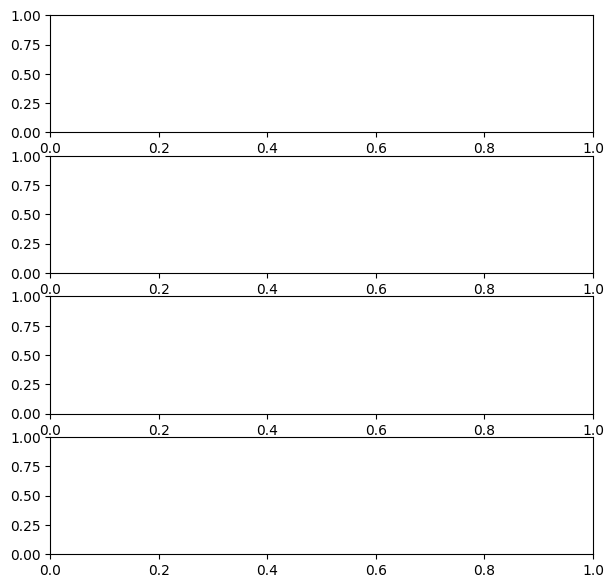

In [13]:
import sys, os
sys.path.insert(0, os.path.abspath('./main_files'))

import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from astropy.table import Table
from datetime import datetime
import astropy.time as at
from pyspi.utils.function_utils import find_response_version
# from pyspi.utils.response.spi_response_data import ResponseDataRMF
# from pyspi.utils.response.spi_response import ResponseRMFGenerator
# from pyspi.utils.response.spi_drm import SPIDRM
from pyspi.utils.livedets import get_live_dets
import pickle
# from MultinestClusterFit import powerlaw_binned_spectrum
# from astromodels import Powerlaw,  PointSource, SpectralComponent



path_smf = "./main_files/spimodfit_comparison_sim_source/smf_real_bkg/0374"
with fits.open(f"{path_smf}/energy_boundaries.fits.gz") as file:
    t = Table.read(file[1])
final_e_bins = np.append(t["E_MIN"], t["E_MAX"][-1])



def pointing_indices_table(data_path, pointings):
    with fits.open(f"{data_path}/pointing.fits") as file:
        t = Table.read(file[1])
        data_pointings = np.array(t["PTID_SPI"])
        time_start = np.array(t["TSTART"]) + 2451544.5
        time_start = [at.Time(f"{i}", format="jd").datetime for i in time_start]
        time_start = np.array([datetime.strftime(i,'%y%m%d %H%M%S') for i in time_start])
        
    assert find_response_version(time_start[0]) == find_response_version(time_start[-1]), "Versions not constant"
    version = find_response_version(time_start[0])
    dets = get_live_dets(time=time_start[0], event_types=["single"])
        
    r_indices = []
    for c_i, cluster in enumerate(pointings):
        t = []
        for p_i, pointing in enumerate(cluster):
            for p_i2, pointing2 in enumerate(data_pointings):
                if pointing[0][:8] == pointing2[:8]:
                    t.append(p_i2)
                    break
        r_indices.append(t)
        
    r_indices = np.array(r_indices)
    
    return r_indices, dets

def rebin_counts(counts, e_bins):
    e_indices = []
    for e in final_e_bins:
        temp = np.argwhere(e_bins==e)
        if len(temp)>0:
            e_indices.append(temp[0][0])
    print(e_bins[e_indices])
    
    counts_binned = np.zeros((len(counts), len(final_e_bins)-1))
    for i in range(len(e_indices)-1):
        counts_binned[:,i] = np.sum(counts[ : , e_indices[i] : e_indices[i+1]], axis=1)
        
    return counts_binned



def calc_var_ratio_size(index_table, counts, lifetimes, dets):
    ratios = []

    for combination in index_table:
        indices1 = [85*combination[0] + i for i in dets]
        indices2 = [85*combination[1] + i for i in dets]
        
        counts1 = counts[indices1]
        counts2 = counts[indices2]
        
        
        mean = (counts1 + counts2) / 2
        variance = (counts1 - mean)**2 + (counts2 - mean)**2
        
        times1 = lifetimes[indices1][:,np.newaxis]
        times2 = lifetimes[indices2][:,np.newaxis]
        

        
        rate = (counts1 + counts2) / (times1 + times2)
        exp_var = (rate*times1 - mean)**2 + (rate*times2 - mean)**2 + rate*(times1 + times2) / 2
        
        for time1, time2, va, ex in zip(times1, times2, variance, exp_var):
            print(time1, time2)
            print(va)
            print(ex)
            print(va/ex)
            print()
        
        rat = variance / exp_var
        
        ratios += list(rat.flatten())
        
    return np.array(ratios)




def setup_var_ratio_calculation(data_path, pointing_path):
    with open(f"{pointing_path}/pointings.pickle", "rb") as f:
        pointings = pickle.load(f)
        
    with fits.open(f"{data_path}/energy_boundaries.fits") as file:
        t = Table.read(file[1])
        e_bins = np.append(t["E_MIN"], t["E_MAX"][-1])
        
    with fits.open(f"{data_path}/dead_time.fits") as file:
        t = Table.read(file[1])
        lifetimes = np.array(t["LIVETIME"])
        
    with fits.open(f"{data_path}/evts_det_spec_orig.fits") as file:
        t = Table.read(file[1])
        counts = rebin_counts(t["COUNTS"], e_bins)
        
    index_table, dets = pointing_indices_table(data_path, pointings)
    
    ratios = calc_var_ratio_size(index_table, counts, lifetimes, dets)
    
    return ratios



pointing_path_0374_norm_pre = "./main_files/spimodfit_comparison_sim_source/pyspi_real_bkg/0374/pre_ppc"
pointing_path_0374_norm_post = "./main_files/spimodfit_comparison_sim_source/pyspi_real_bkg/0374/post_ppc"

pointing_path_0374_far_pre = "./main_files/spimodfit_comparison_sim_source/pyspi_real_bkg/0374/pre_ppc_far"
pointing_path_0374_far_post = "./main_files/spimodfit_comparison_sim_source/pyspi_real_bkg/0374/post_ppc_far"

pointing_path_0374_triple_pre = "./main_files/spimodfit_comparison_sim_source/pyspi_real_bkg/0374/pre_ppc_triple"
pointing_path_0374_triple_post = "./main_files/spimodfit_comparison_sim_source/pyspi_real_bkg/0374/post_ppc_triple"

pointing_path_1662_pre = "./main_files/ppc_test/ppc_test_1662_correct"
pointing_path_1662_post = "./main_files/ppc_test/ppc_test_1662_simple_wo_outliers"

data_path_0374 = "./main_files/SPI_data/0374"
data_path_1662 = "./main_files/SPI_data/1662"


def log_hist(a, num_bins=50):
    log_bins = np.geomspace(0.001, a.max(), num_bins)
    log_bins = np.append(0, log_bins)
    hist, bins = np.histogram(a, log_bins)
    return hist, bins


fig, ax = plt.subplots(nrows=4, figsize=(7,7))


ratios_0374_norm_pre = setup_var_ratio_calculation(data_path_1662, pointing_path_1662_pre)


In [3]:
import numpy as np

a = np.array([0,0.1,])

In [7]:
((0.1**(1/3))*2)**3

0.8000000000000002

In [8]:
(1/2)**(1/3)

0.7937005259840998